In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

# Configure matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set seaborn style
sns.set_style("whitegrid")

2025-01-14 08:46:53.620255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736824613.631015  109307 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736824613.634439  109307 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 08:46:53.647416: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def get_text():
  path = tf.keras.utils.get_file('nietzsche.txt',
                               origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt') 
  text = open(path).read().lower()
  return text

In [5]:
text_data = get_text()
print("Character length: {0}".format(len(text_data)))

Character length: 600893


In [6]:
print(text_data[:100])

preface


supposing that truth is a woman--what then? is there not ground
for suspecting that all ph


In [7]:
def preprocess_split(text, max_len, step):
  sentences, next_char = [], []
  for i in range(0, len(text) - max_len, step):
    sentences.append(text[i: i + max_len])
    next_char.append(text[i + max_len])
  char_lst = sorted(list(set(text)))
  char_dict = {char: char_lst.index(char) for char in char_lst}
  X = np.zeros((len(sentences), max_len, len(char_lst)), dtype=np.bool)
  y = np.zeros((len(next_char), len(char_lst)), dtype=np.bool)
  for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
      X[i, j, char_dict[char]] = 1
    y[i, char_dict[next_char[i]]] = 1
  return X, y, char_dict

In [8]:
max_len = 60
step = 3
X, y, char_dict = preprocess_split(text_data, max_len, step)
vocab_size = len(char_dict)
print("Number of sequences: {0}\nNumber of unique characters: {1}".format(len(X), vocab_size))

Number of sequences: 200278
Number of unique characters: 57


In [9]:
def build_model(max_len, vocab_size):
  inputs = layers.Input(shape=(max_len, vocab_size))
  x = layers.LSTM(128)(inputs)
  output = layers.Dense(vocab_size, activation=tf.nn.softmax)(x)
  model = Model(inputs, output)
  model.compile(optimizer='adam', loss='categorical_crossentropy')
  return model

I0000 00:00:1736824631.349719  109307 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1461 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


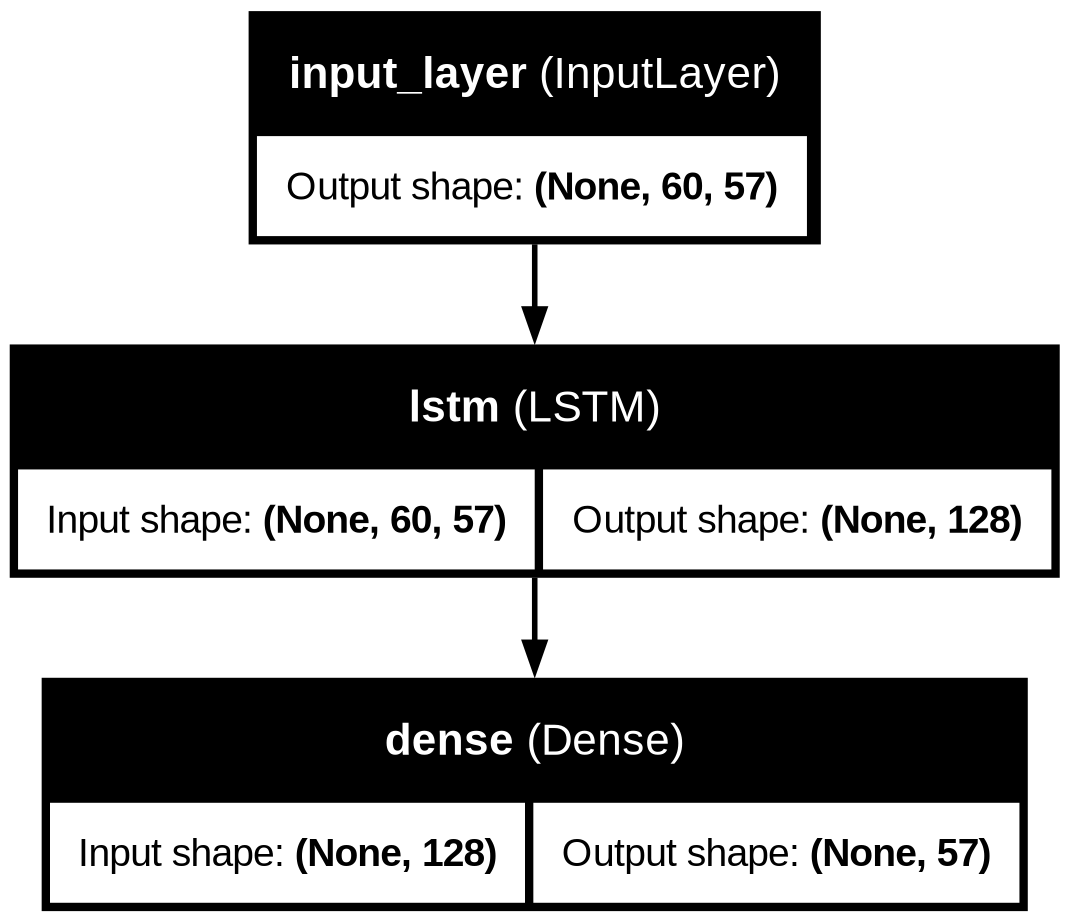

In [10]:
model = build_model(max_len, vocab_size)
plot_model(model, show_shapes=True, show_layer_names=True)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 57)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        95,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 57)             │         7,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,585 (400.72 KB)

 Trainable params: 102,585 (400.72 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X, y, epochs=50, batch_size=128)

Epoch 1/50


2025-01-14 08:47:17.568895: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 684950760 exceeds 10% of free system memory.
2025-01-14 08:47:17.966188: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 684950760 exceeds 10% of free system memory.


   1/1565 ━━━━━━━━━━━━━━━━━━━━ 28:07 1s/step - loss: 4.0394

I0000 00:00:1736824639.042128  109421 cuda_dnn.cc:529] Loaded cuDNN version 90300


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 2.7872
Epoch 2/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - loss: 2.2162
Epoch 3/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - loss: 2.0635
Epoch 4/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - loss: 1.9710
Epoch 5/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 1.8902
Epoch 6/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 1.8344
Epoch 7/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 1.7760
Epoch 8/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 1.7390
Epoch 9/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 1.7015
Epoch 10/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 1.6699
Epoch 11/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 1.6421
Epoch 12/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 1.6197
Epoch 13/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 1.5940
Epoch 14/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 1.5763
Epoch 15/50


In [13]:
model.export('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


Saved artifact at 'model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 57), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 57), dtype=tf.float32, name=None)
Captures:
  125165338416656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125165338421648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125165338419536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125165338416464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125165338421072: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [14]:
def plot_learning_curve(history):
  loss = history.history['loss']
  epochs = [i for i, _ in enumerate(loss)]
  plt.scatter(epochs, loss, color='skyblue')
  plt.xlabel('Epochs'); plt.ylabel('Cross Entropy Loss')
  plt.show()

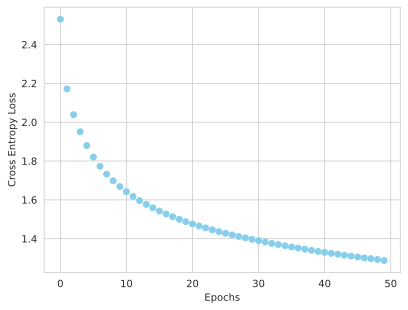

In [15]:
plot_learning_curve(history)

In [16]:
def random_predict(prediction, temperature):
  prediction = np.asarray(prediction).astype('float64')
  log_pred = np.log(prediction) / temperature
  exp_pred = np.exp(log_pred)
  final_pred = exp_pred / np.sum(exp_pred)
  random_pred = np.random.multinomial(1, final_pred)
  return random_pred

In [17]:
def generate_text(model, data, iter_num, seed, char_dict, temperature=1, max_len=60):
  entire_text = list(data[seed])
  for i in range(iter_num):
    prediction = random_predict(model.predict(np.array([entire_text[i: i + max_len]]))[0], temperature)
    entire_text.append(prediction)
  reverse_char_dict = {value: key for key, value in char_dict.items()}
  generated_text = ''
  for char_vec in entire_text:
    index = np.argmax(char_vec)
    generated_text += reverse_char_dict[index]
  return generated_text

In [22]:
def vary_temperature(temp_lst, model, data, iter_num, seed, char_dict):
    store = []
    for temperature in temp_lst:
        store.append("Generated text at temperature {0}:\n{1}\n\n".format(temperature, generate_text(model, data, iter_num, seed, char_dict, temperature)))
        print(store[-1])
    return store

In [23]:
store = vary_temperature([0.3, 0.6, 1.2], model, X, 1000, 10, char_dict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [24]:
for sentence in store:
    print(sentence)

Generated text at temperature 0.3:
 is a woman--what then? is there not ground
for suspecting the profounders, and the case the contradiction and sensition, and the highest soulse of the masters of the most desires the most personal conscience of the feelings in the existence of a pribord, one may be its own interpretation that the man and the same the fact the action of the most prical into the most same the greatest the most conduct and spirit, and the most the most because one may be as a man of the individual, and all the realing and conscience of the masters of the fact the enough in the best of the means of the man as the most contrary the desires, the most concealed by the only the masters of the master and the same the standination of the most sense of the very prider the sense of the morality, and the same and the present creasure in the feeling of the means of the morality of the man as a sounding things as the consideration of the contrary of the feelings of the subjective, 